# Trabalho Prático

Cálculo Numérico (SME0104)
Professora Cynthia Lage Ferreira

Alunos:

Clara Ernesto de Carvalho - N USP: 14559479

Renan Parpinelli Scarpin - N USP: 14712188

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')
import scipy.interpolate as spi

# 1 - Sistemas Lineares

In [2]:

#Func1 é uma função de decomposição L.U. clássica que elimina todas as entradas abaixo do pivô
#A Complexidade é O((n^3)/3)
def func1(A):
    n = A.shape[0] #Extrai as dimensões de A
    U = A.copy() #Copia a A para U
    L = np.eye(n) #Define a L como uma matriz identidade das dimensões de A
    for j in range (n - 1): #Percorre todas as colunas de U até n - 2
        for i in range (j + 1,n): #Percorre todas as linhas de U abaixo da diagonal
            L[i,j] = U[i,j] / U[j,j] #Encontra o multiplicador de linha j necessário para zerar U[i,j] usando U[j,j] como pivô
            U[i,j:n] = U[i,j:n] - L [i,j] * U[j,j:n] #Eliminação das linhas abaixo do Pivô
    return (L,U) #Retorna as matrizes L e U da decomposição

#Func2 é uma função de decomposição L.U. que elimina apenas as entradas abaixo do pivô dentro de um intervalo p
#Retorna o mesmo resultado de Func1 quando A é matriz banda de largura de banda 2*p+1
#A Complexidade é O((n * p^2)/3)
def func2 (A,p):
    n = A.shape[0] #Extrai as dimensões de A
    U = A.copy() #Copia de A para U
    L = np.eye(n) #Define L como uma matriz identidade de dimensões A
    for j in range (n - 1): #Percorre todas as colunas de U até n - 2
        v = min (n,j+p+1) #Restringe o intervalo de operações do algoritmo para a região não nula da matriz U
        for i in range (j+1,v): #Itera apenas na região não nula
            L[i,j] = U[i,j] / U[j,j] #Encontra o multiplicador de linha j necessário para zerar U[i,j] usando U[j,j] como pivô
            U[i,j:v] = U[i,j:v] - L [i,j] * U[j,j:v] #Eliminação das linhas apenas dentro da banda de operação
    return (L,U)

#Exemplo
n = 2000 #Dimensões da Matriz
p = 2 #Largura da banda será 2*p+1
A = np.zeros((n,n)) #Inicializa uma matriz zerada

#Constroi uma matriz com valores aleatórios dentro da banda e deixa zeros fora da banda
for i in range (n):
    for j in range (max(0,i-p),min(n,i+p+1)):
        A[i,j] = np.random.normal()

starttime = time.time() #Guarda um tempo de início
(L,U) = func1(A) #Executa a func1
endtime=time.time() #Guarda um tempo de fim
print(endtime - starttime) #Imprime o tempo de execução da func1
starttime=time.time() #Guarda um tempo de início
(L,U)=func2(A,p) #Executa a func2
endtime=time.time() #Guarda um tempo de fim
print(endtime - starttime) #Imprime o tempo de execução da func2
print(np.linalg.norm(L@U - A)) #Imprime a norma da diferença entre L@U e A, que deve ser próxima de zero
print(np.linalg.norm(L@U - A)) #Imprime a norma da diferença entre L@U e A, que deve ser próxima de zero

6.450186014175415
0.018931150436401367
1.2692610791317218e-13
1.2692610791317218e-13


## Comentários
Podemos observar que func2 pode ser extremamente mais rápida que func1 quando o valor de p por bem menor que n, assim como no exemplo. Entretanto, é importante destacar que func2 não é uma versão mais rápida e precisa da decomposição L.U. para quaisquer casos, pois quando trabalhando com matrizes que não respeitam a largura de banda haverão imprecisões no resultado. Quanto mais a matriz respeitar a banda, menor as imprecisões e, portanto, se torna interessante utilizar uma decomposição L.U. bandada (como func2) ao invés de uma decomposição genérica que percorra todos os elementos de forma desnecessária.

# 2) Zeros de funções e sistemas não lineares

Neste exercício usamos dois métodos para achar o valor de altura de colisão de um projétil

## a)
Neste exercício temos que calcular a altura que o projétil atingirá a elevação utilizando o método da bisseção.

Sendo assim, utilizamos a diferença das funções $p$ e $q$, uma vez que quando a diferença for 0, haverá a colisão.

Escolhemos os valores de 3 e 3.5 para o intervalo, com base no gráfico disponível on exercício

In [3]:
p = lambda x: -x**4 + 7.7*x**3 - 18*x**2 + 13.6*x
q = lambda x: -x**2 + 5*x + 0.75
f = lambda x: p(x) - q(x)


def bisection(f, a, b):
    if f(a) * f(b) >= 0:
        return None
    tol = 0.001
    max_iter = 5
    iter_count = 0
    x = a
    while (b - a) / 2 > tol and iter_count < max_iter:
        x = (a + b) / 2
        if f(x) == 0:
            break
        elif f(a) * f(x) < 0:
            b = x
        else:
            a = x
        iter_count += 1
    return x

x_colision= bisection(f, 3, 3.5)

print(x_colision, f(x_colision), q(x_colision), p(x_colision))
print("A altura que o projétil atinge a elevação é de aproximadamente", q(x_colision), "metros")

3.171875 -0.005737555027018004 6.548583984375 6.542846429347982
A altura que o projétil atinge a elevação é de aproximadamente 6.548583984375 metros


### Resultados:
Nesse caso podemos observar que o método encontrou a raiz com valor de erro de -0.005. Caso aumentássemos o número de iterações, poderíamos alcançar a precisão desejada de 0.001

Como foi mostrado na célula de código acima, o valor de altura achado foi $6.546 +- 0.003$

## b)
Para utilizar o método de newton para sistemas, adaptamos o problema pra $\R^2 \rightarrow \R^2$ como pedido.

Para isso, consideramos que precisamos achar valor para y, tal que $p(x) - y = 0$, e $q(x) - y = 0$

Dessa forma alcançamos o sistema

$$
\begin{cases}
p(x)-y = 0 \\
q(x)-y = 0
\end{cases}
$$

Assim geramos a função F a ser minimizada:

$$
F =
\begin{bmatrix}
p(x)-y \\
q(x)-y \\
\end{bmatrix}
$$

E a Jacobiana dela:

$$
J =
\begin{bmatrix}
-4x^3 + 23.1x^2 - 36x + 13.6 && -1 \\
-2x + 5 && -1 \\
\end{bmatrix}
$$


Assim, temos o que precisamos para utilizar o método de Newton para sistemas e achar a altura de colisão.

Escolhemos o valor 3 inicial para x baseado no gráfico informado no exercício

In [4]:
def F(X):
    x, y = X
    return np.array([
        p(x) - y,
        q(x) - y
    ])

def J(X):
    x, _ = X
    return np.array([
        [-4*x**3 + 23.1*x**2 - 36*x + 13.6, -1],
        [-2*x + 5, -1]
    ])


def newton(F, J, X0):
    tol = 0.001
    X = X0
    i = 0
    while(True):
        i+=1
        Fx = F(X)
        Jx = J(X)
        v = np.linalg.solve(Jx, Fx)
        X = X - v
        if np.linalg.norm(v) < tol:
            return X, i


X0 = np.array([3, q(3)])
solution, iterations = newton(F, J, X0)

print("x, y: ", solution[0], solution[1])
print("iterações:", iterations)
print(q(solution[0]), p(solution[0]))

x, y:  3.1729162983206463 6.547183663998295
iterações: 3
6.54718365545444 6.547183620346885


### Resultado

Como podemos ver, o método de newton para sistemas convergiu para o resultado em apenas 3 iterações, alcançando facilmente o valor de 0.001 de precisão.

### Comparação

Vimos que ambos os métodos convergiram para o resultado correto, entretanto o primeiro método necessitaria de mais iterações para alcançar a precisão esperada, enquanto o segundo método encontrou em apenas 3 iterações o resultado com a precisão pedida no exercício.

# 3) SVD

## a) Método de Francis
Implementação do método de Francis para a obtenção dos autovalores e autovetores da matriz

In [5]:
# Função de Francis para obtenção dos autovalores e autovetores de uma matriz simétrica
def francis(A, tol = 1e-12):

    #Inicializando as variáveis necessárias
    n = np.shape(A)[0] # Extrai as dimensões de A
    A_copy = np.copy(A) # Cria uma cópia de A para evitar modificações diretas
    V = np.eye(n) # Cria uma matriz identidade de dimensões A
    erro = np.inf # Inicializa o erro como infinito

    #Aplicação do método iterativo de Francis
    while erro > tol: # Itera até que o erro seja menor que a tolerância
        [Q,R] = np.linalg.qr(A_copy) # Realiza a decomposição QR
        A_copy = R.dot(Q) # Atualiza A_copy com o produto R*Q
        V = V.dot(Q) # Atualiza V com o produto V*Q. V é a matriz de autovetores.

        # Calcula o erro como o máximo valor absoluto do último subdiagonal
        erro = abs(A_copy[-1, -2])

    D = np.diag(A_copy) # Extrai a diagonal de A_copy como D. D é o vetor de autovalores

    return D,V # Retorna D (vetor de autovalores) e V (matriz de autovetores)

# Criando uma matriz de exemplo para testar o método de Francis
A = np.array([[4, 0, 0],
              [0, 3, 2],
              [5, 9, 7],
              [0, 3, 3]], dtype='double')

AtA = np.transpose(A).dot(A) # Calculando A^T * A
print(AtA) # A matriz AtA deve ser simétrica e positiva definida
n_c = np.shape(AtA)[0] # Obtendo a dimensão da matriz AtA
(D,V) = francis(AtA) # Aplicando o método de Francis na matriz AtA para obter os autovalores e autovetores

# Exibindo os autovetores
print('Autovetores:\n')
print(V)

# Exibindo os autovalores
print('Autovalores:\n')
print(D)

# Verificando a ortogonalidade dos autovetores
# A matriz V deve ser ortogonal, ou seja, V^T * V deve ser a matriz identidade
print('\nOrtogonalidade dos autovetores\n')
VtV = np.transpose(V).dot(V)
I = np.eye(n_c)
norm_I_c = np.linalg.norm(I-VtV,'fro')
print('O erro de ortogonalidade é: %.2e\n' %(norm_I_c))

[[41. 45. 35.]
 [45. 99. 78.]
 [35. 78. 62.]]
Autovetores:

[[ 0.37149105 -0.92817319  0.02211167]
 [ 0.72889531  0.27681524 -0.62616687]
 [ 0.57507045  0.24873248  0.77937547]]
Autovalores:

[183.47384707  18.20002979   0.32612314]

Ortogonalidade dos autovetores

O erro de ortogonalidade é: 1.42e-15



## b) SVD
Com a capacidade de extrair os autovalores e autovetores de uma matriz pelo método de Francis, agora podemos realizar a decomposição SVD.

In [6]:
def svd(A):

    # Obtendo autovalores e autovetores da matriz AtA
    AtA = np.transpose(A).dot(A)  # Calcula A^T * A
    autoval, autovet = francis(AtA)  # Obtém autovalores e autovetores usando o método de Francis

    # Ordenando os autovalores e autovetores
    idx = np.argsort(autoval)[::-1]  # Obtém os índices dos autovalores em ordem decrescente
    autoval = autoval[idx]  # Reordena os autovalores
    autovet = autovet[:, idx]  # Reordena os autovetores de acordo com os autovalores

    # Calculando os valores singulares
    sigma = np.sqrt(np.clip(autoval, 0, None))  # Calcula os valores singulares como a raiz quadrada dos autovalores
    Sigma = np.zeros(A.shape)  # Inicializa a matriz Sigma com zeros
    np.fill_diagonal(Sigma, sigma)  # Preenche a diagonal de Sigma com os valores singulares

    # Calculando os autovetores da matriz A
    U = A.dot(autovet)  # Calcula os autovetores da matriz A como o produto de A e os autovetores de AtA
    U_norm = np.linalg.norm(U, axis=0)  # Calcula a norma de cada coluna de U
    U = U / U_norm  # Normaliza os autovetores de U

    # Retornando as matrizes U, Sigma e Vt
    return U, sigma, autovet.T  # Retorna U, Sigma e a transposta dos autovetores de AtA (Vt)

# Criando uma matriz de exemplo para testar o SVD
A = np.array([[4, 0, 0],
              [0, 3, 2],
              [5, 9, 7],
              [0, 3, 3]], dtype='double')

# Aplicando a decomposição SVD na matriz A
U, sigma, Vt = svd(A)

Sigma = np.diag(sigma)  # Criando a matriz Sigma a partir dos valores singulares
A_svd = U.dot(Sigma).dot(Vt)  # Reconstruindo a matriz A a partir de U, Sigma e Vt

print('Matriz original A:\n')
print(A)  # Exibindo a matriz original A
print('\nMatriz reconstruida pelo SVD:\n')
print(A_svd)  # Exibindo a matriz reconstruída a partir do SVD


Matriz original A:

[[4. 0. 0.]
 [0. 3. 2.]
 [5. 9. 7.]
 [0. 3. 3.]]

Matriz reconstruida pelo SVD:

[[4.00000000e+00 1.09333236e-15 1.10353639e-15]
 [1.43386905e-15 3.00000000e+00 2.00000000e+00]
 [5.00000000e+00 9.00000000e+00 7.00000000e+00]
 [1.59933097e-15 3.00000000e+00 3.00000000e+00]]


Podemos observar que existe um erro na casa do 10^(-15).

Portanto a precisão da decomposição SVD é satisfatória.

Agora podemos testar a precisão quando usamos apenas k valores singulares.

## c) Compressão de imagem com SVD
Podemos utilizar a decomposição SVD como uma forma simples de comprimir imagens monocromáticas. Interpretando cada pixel como um valor real entre 0 e 1 onde 0 é totalmente escuro e 1 é totalmente claro.

Assim, podemos transformar a imagem em uma matriz que pode ser decomposta com SVD e reduzida apenas para os valores singulares mais relevantes, economizante memória.

Para descomprimir basta multiplicar os componentes que foram salvos, quanto menos valores singulares utilizarmos maior será a taxa de compressão e menor será a qualidade da imagem após a descompressão.

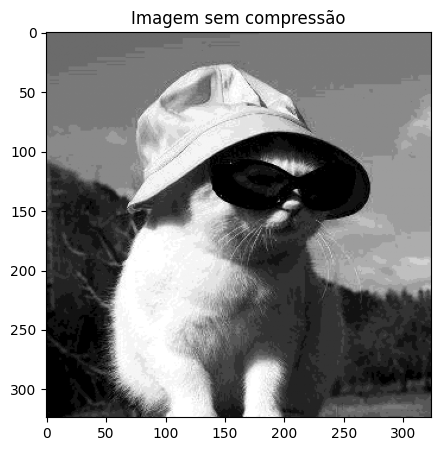

In [8]:
imagem_og = plt.imread("cat.png")[:, :, 0]

plt.figure(figsize=(8, 5))
plt.imshow(imagem_og, cmap='gray')
plt.title('Imagem sem compressão')
plt.show()

In [9]:
#Aplica o SVD na matriz da imagem, os componentes da decomposição do nosso SVD e do SVD do numnpy serão usados para todas as compressões

#Nosso algoritmo SVD
start_time_my_svd = time.time()
my_U_img, my_sigma_img, my_Vt_img = svd(imagem_og)
my_Sigma_img = np.diag(my_sigma_img)
end_time_my_svd = time.time()
total_time_my_svd = end_time_my_svd - start_time_my_svd
print(f"Tempo de execução do nosso algoritmo SVD: {total_time_my_svd} segundos")

#SVD do numpy
start_time_np_svd = time.time()
np_U_img, np_sigma_img, np_V_img = np.linalg.svd(imagem_og)
np_Vt_img = np_V_img
m_img, n_img = imagem_og.shape
np_Sigma_img = np.zeros((m_img, n_img), dtype=np.float64)
np.fill_diagonal(np_Sigma_img, np_sigma_img)
end_time_np_svd = time.time()
total_time_np_svd = end_time_np_svd - start_time_np_svd
print(f"Tempo de execução do SVD do numpy: {total_time_np_svd} segundos")


Tempo de execução do nosso algoritmo SVD: 0.6474311351776123 segundos
Tempo de execução do SVD do numpy: 0.02499079704284668 segundos


In [10]:
# Calcula a quantidade de valores singulares a ser usada para comprimir em uma determinada taxa
def taxa_compressao(imagem, taxa):
    m, n = imagem.shape  # Obtém as dimensões da imagem
    k = round((1 - taxa) * min(m, n))  # Calcula o número de valores singulares com base na taxa
    return k

k_50 = taxa_compressao(imagem_og, 0.5)
k_70 = taxa_compressao(imagem_og, 0.7)
k_95 = taxa_compressao(imagem_og, 0.95)

# Recorta as matrizes da decomposição SVD para apenas os valores singulares mais relevantes
def compress_k(U, Sigma, Vt, k):
  return U[:, :k], Sigma[:k, :k], Vt[:k, :]

# Multiplica U, Sigma e Vt para reconstituir uma matriz que pode ou não ter sido comprimida e reaparecer com perda de qualidade
def decompress_k(U, Sigma, Vt):
  return U.dot(Sigma).dot(Vt)

#Comprime e descomprime para aplicar a perda de informação diretamente e testar as funções
def compress_decompress_k(U, Sigma, Vt, k):
  U_k, Sigma_k, Vt_k = compress_k(U, Sigma, Vt, k)
  return decompress_k(U_k, Sigma_k, Vt_k)

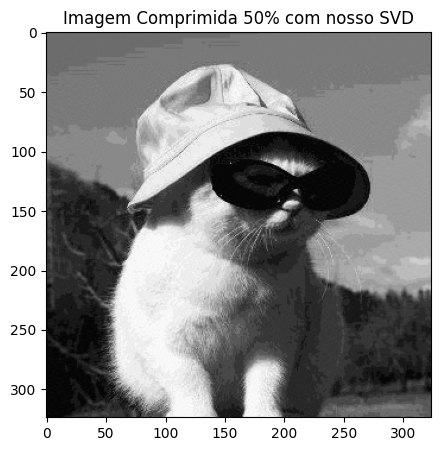

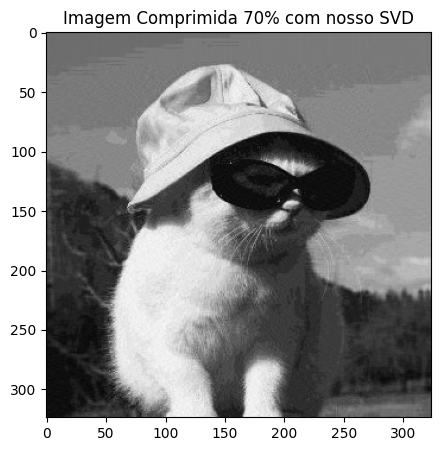

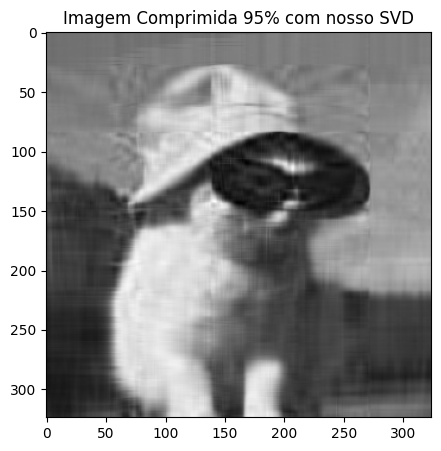

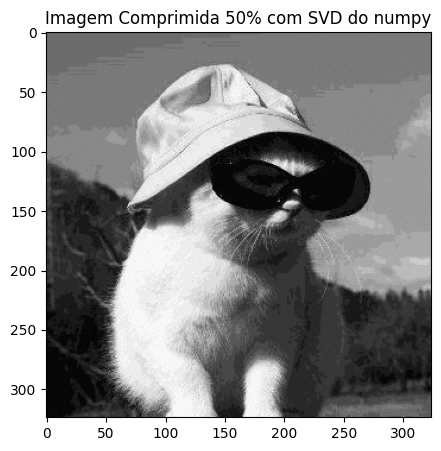

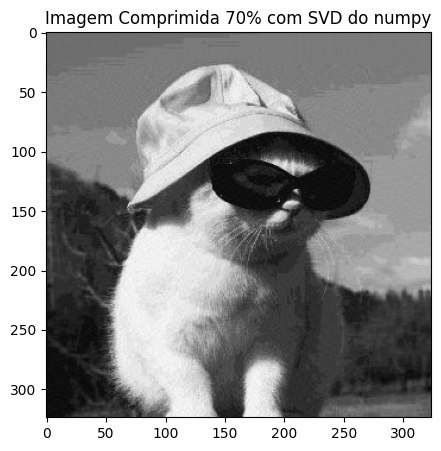

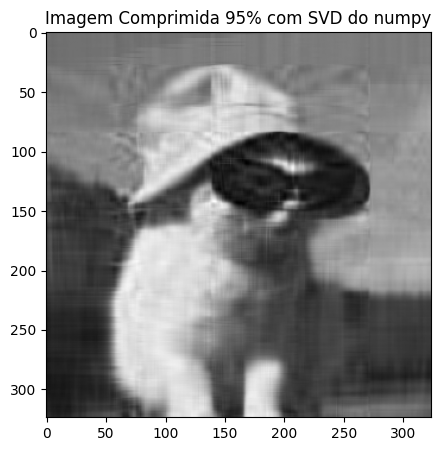

In [11]:
# Exibe a Imagem Comprimida 50% com nosso SVD
plt.figure(figsize=(8, 5))
plt.imshow(compress_decompress_k(my_U_img, my_Sigma_img, my_Vt_img, k_50), cmap='gray')
plt.title(f'Imagem Comprimida 50% com nosso SVD')
plt.show()

# Exibe a Imagem Comprimida 70% com nosso SVD
plt.figure(figsize=(8, 5))
plt.imshow(compress_decompress_k(my_U_img, my_Sigma_img, my_Vt_img, k_70), cmap='gray')
plt.title(f'Imagem Comprimida 70% com nosso SVD')
plt.show()

# Exibe a Imagem Comprimida 95% com nosso SVD
plt.figure(figsize=(8, 5))
plt.imshow(compress_decompress_k(my_U_img, my_Sigma_img, my_Vt_img, k_95), cmap='gray')
plt.title(f'Imagem Comprimida 95% com nosso SVD')
plt.show()

#Exibe a Imagem Comprimida 50% com SVD do numpy
plt.figure(figsize=(8, 5))
plt.imshow(compress_decompress_k(np_U_img, np_Sigma_img, np_Vt_img, k_50), cmap='gray')
plt.title(f'Imagem Comprimida 50% com SVD do numpy')
plt.show()

#Exibe a Imagem Comprimida 70% com SVD do numpy
plt.figure(figsize=(8, 5))
plt.imshow(compress_decompress_k(np_U_img, np_Sigma_img, np_Vt_img, k_70), cmap='gray')
plt.title(f'Imagem Comprimida 70% com SVD do numpy')
plt.show()

#Exibe a Imagem Comprimida 95% com SVD do numpy
plt.figure(figsize=(8, 5))
plt.imshow(compress_decompress_k(np_U_img, np_Sigma_img, np_Vt_img, k_95), cmap='gray')
plt.title(f'Imagem Comprimida 95% com SVD do numpy')
plt.show()

## Comentários sobre o SVD para compressão
Podemos observar que tanto o nosso próprio SVD implementado com o nosso método de Francis e o SVD do numpy respeitaram aquilo que foi esperado. Quanto menos valores singulares são utilizados você consegue guardar os componentes do SVD com menos memória, entretanto maior será a perda de informação ao reconstruir a matriz original.

Essa perda de informação fica especialmente visível quando a matriz é uma imagem que pode ser observada com tanta clareza de forma tão intuitiva.

As perdas com 50 porcento e 70 porcento de compressão não são tão visíveis, por isso adicionamos uma terceira etapa de comprimir a imagem em 95 porcento tanto com nosso método SVD quanto com o SVD do numpy para demonstrar que nessa taxa a perda de qualidade é totalmente perceptível.

# 4) Interpolação

Nesse exercício teremos que comparar diversos métodos em diferentes cenários para interpolação.

## a)
A seguir foram desenvolvidas as funções para interpolação utilizando método de newton e método de lagrange.

A diferença entre as duas funções é que a de newton recebe um vetor de x e retorna um vetor de resultados y, enquanto a de lagrange recebe um valor x e retorna um valor y.
Como não haverá comparação de tempo, a lagrange foi desenvolvida assim pois consideramos mais intuitivo, e a não ser que o numpy utilize paralelização nos cálculos com vetores, não haverá diferença de complexidade entre ambas as opções de implementação

In [12]:
def newton_interpolation(xi, yi, x):
    n = np.size(xi)
    nr = np.size(x)
    a = np.ones((n,nr))
    diffs = np.zeros((n,n))
    diffs[:,0] = yi

    # Diff matrix
    for j in np.arange(n-1):
        for i in np.arange(n-j-1):
            diffs[i,j+1] = (diffs[i+1,j]-diffs[i,j])/(xi[i+j+1]-xi[i])

    for i in np.arange(1,n):
        a[i,:] = a[i-1,:]*(x-xi[i-1])

    y = diffs[0,:].dot(a)

    return y

def lagrange_interpolation(xi, yi, x):
    n = np.size(xi)

    l = np.ones(n)

    # calculate the l_k(x) coefficients
    for k in range(n):
        for i in range(n):
            if i != k:
                l[k] = l[k]*((x-xi[i])/(xi[k]-xi[i]))
    # calculate the final value for P(x) = y
    y = 0
    for i in range(n):
        y += l[i]*yi[i]
    return y



## b)

Iremos gerar o gráfico utilizando 11 pontos, tanto com interpolação de Lagrange quanto Newton

In [13]:
# info from the exercise description
f = lambda t: 1/(1+(25*t*t))
a = -1
b = 1
n = 11

In [14]:
# generate the points for interpolation
xi = np.linspace(a,b,n, endpoint=True)
yi = np.array([f(i) for i in xi])

# generate the points for plotting
xs = np.linspace(a, b, num =101, endpoint=True)
yf = np.array([f(x) for x in xs])

### Lagrange

In [15]:
# calculate the y values using lagrange
ysl = np.array([lagrange_interpolation(xi, yi, x) for x in xs])

# we calculate the mean squared error using the 11 points for interpolation
# this will be used in letter c) to compare with the 21 points
errors = ysl - yf
squared_errors = np.square(errors)
mse_11 = np.mean(squared_errors)

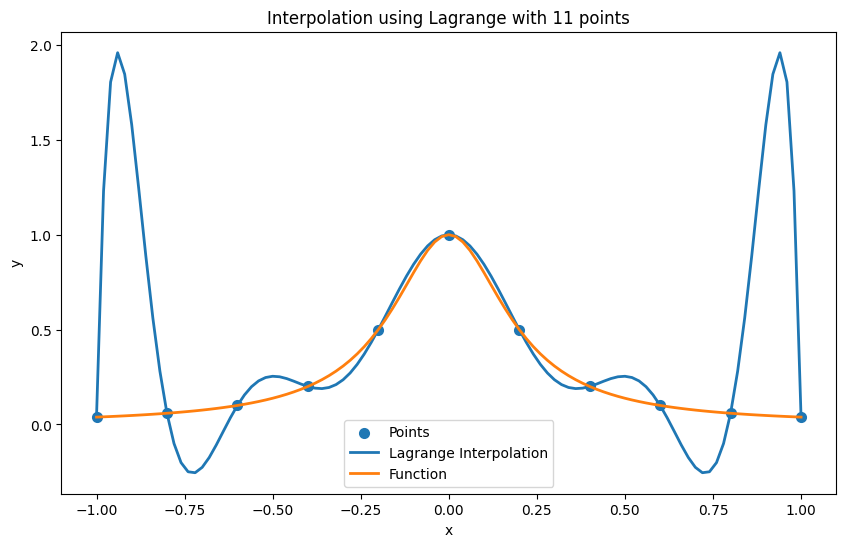

In [16]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Lagrange with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysl,label = 'Lagrange Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

### Newton

In [17]:
# calculate the y values using newton
ysn = newton_interpolation(xi, yi, xs)

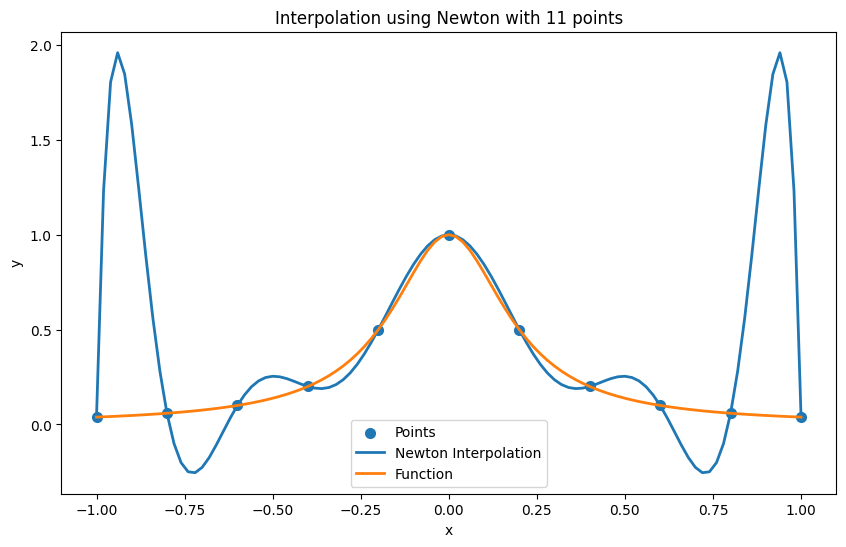

In [18]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Newton with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysn,label = 'Newton Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

#### Mesmo gráfico

Como podemos ver ambos métodos resultaram no mesmo gráfico, isto se deve à prova de que há um único polinômio P(x) de grau n, que leva todo valor x ao seu valor y, dentre os x e y dos dados iniciais.

Isto pode ser comprovado com os seguintes passos:

##### Demonstração
O polinômio P(x) de grau n, precisa resultar em y_i para todo x_i presente nos dados, portanto podemos alcançar o sistema de equações:
$$
\begin{cases}
P_n(x_0) = \alpha_0 + \alpha_1 x_0 + \alpha_2 {x_0}^2 + ... + \alpha_n {x_0}^n
\\
...
\\
P_n(x_n) = \alpha_0 + \alpha_1 x_n + \alpha_2 {x_n}^2 + ... + \alpha_n {x_n}^n
\end{cases}
$$

A partir do sistema, podemos transformá-lo em sua forma matricial:
$$
\begin{bmatrix}
1 && x_0 && {x_0}^2 && ... && {x_0}^n \\
\vdots && \vdots && \vdots && \ddots && \vdots \\
1 && x_n && {x_n}^2 && ... && {x_n}^n
\end{bmatrix}

\begin{bmatrix}
\alpha_0 \\
\vdots \\
\alpha_n
\end{bmatrix}

=

\begin{bmatrix}
y_0 \\
\vdots \\
y_n
\end{bmatrix}
$$

Assim, podemos notar que a matriz X definida como:
$$
X =
\begin{bmatrix}
1 && x_0 && {x_0}^2 && ... && {x_0}^n \\
\vdots && \vdots && \vdots && \ddots && \vdots \\
1 && x_n && {x_n}^2 && ... && {x_n}^n
\end{bmatrix}
$$

é uma matriz de vandermond.

Como temos a condição $ x_i \neq x_j,  \forall x, j$, então o determinante da matriz X é diferente de 0. ($ det(X) \neq 0 $)

Ou seja, a matriz X é invertível, e haverá um único conjunto de valores $ \alpha_i $, que resolvem o sistema. E este conjunto de valores por consequência determinam um único polinômio P(x) de grau n.


##### Conclusão
Como há um único polinômio P(x) de grau n que resolve o sistema de equações iniciais, e tanto os métodos de Lagrange quanto Newton precisam resolvem este sistema, então o polinômio alcançado por ambos os métodos precisam ser os mesmos


## c)
Neste exercício iremos utilizar 21 pontos para iterpolar a função f.
Veremos que o erro quadrático médio é maior nesse caso, e que isso ocorre devido ao fenômeno de Runge

In [19]:
# We substitute the value of n points to 21,
# and run the code of letter b) again.
n = 21

In [20]:
xi = np.linspace(a,b,n, endpoint=True)
yi = np.array([f(i) for i in xi])

### Lagrange

In [21]:
ysl = np.array([lagrange_interpolation(xi, yi, x) for x in xs])

# we calculate the mean squared error using the 21 points for interpolation
errors = ysl - yf
squared_errors = np.square(errors)
mse_21 = np.mean(squared_errors)

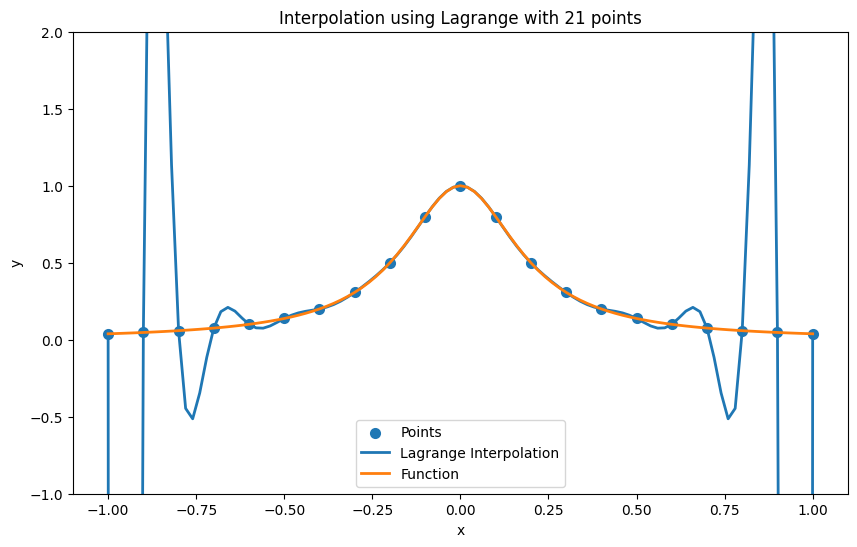

In [22]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Lagrange with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysl,label = 'Lagrange Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.ylim(-1, 2)
plt.show()

### Newton

In [23]:
ysn = newton_interpolation(xi, yi, xs)

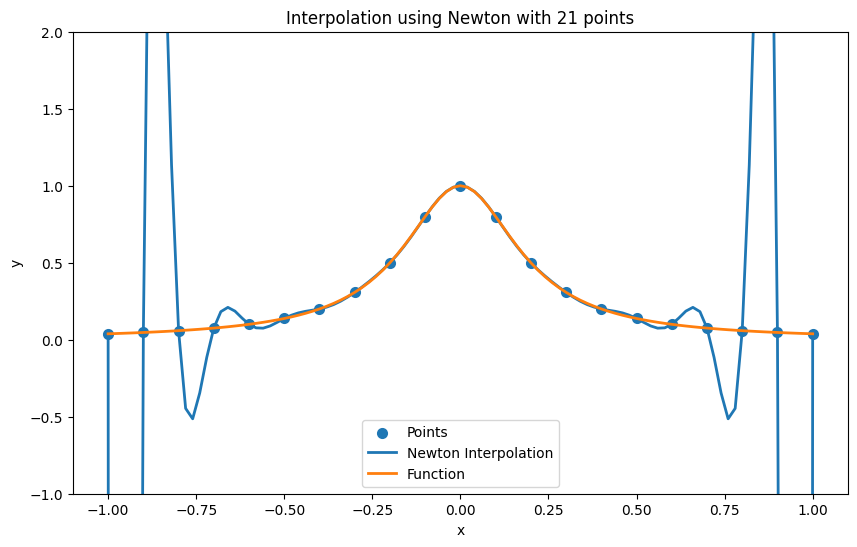

In [24]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Newton with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysn,label = 'Newton Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.ylim(-1, 2)
plt.show()

In [25]:
print(f'MSE with 11 equally distributed points: {mse_11}')
print(f'MSE with 21 equally distributed points: {mse_21}')
print(f'Errors ratio: {mse_21/mse_11}')

MSE with 11 equally distributed points: 0.33328575573986596
MSE with 21 equally distributed points: 137.81624664157084
Errors ratio: 413.5077610371632


#### Análise

Utilizando os valores que foram mostrados na célula acima, o valor de erro quadrático médio utilizando 21 pontos para interpolação é 413 vezes maior do que utilizando 11 pontos.
> Calculamos os erros utilizando apenas Lagrange, uma vez que o polinômio que Newton gera é o mesmo, e calcular utilizando-o resultaria no mesmo valor

Esta enorme diferença se deve ao fenômeneo de Runge.

#### Fenômeno de Runge

O Fenômeno de Runge é a afirmação de que não há nenhuma garantia de que o Polinômio $ P_n$ de grau n converge para f, conforme o grau n tende a infinito, caso a distribuição de nós tenha x uniforme.

Sendo assim, conforme o número de nós, e consequentemente o grau do polinômio, aumenta, o erro da interpolação tende a aumentar

Para evitar este problema, duas alternativas são utilizadas
- Interpolação por partes (Será feita na letra d) )
- Nós de Chebyshev (Será feita na letra e) )


## d)
Neste exercício iremos utilizar splines utilizando 21 nós para realizar interpolação por partes. Como a interpolação por partes utiliza apenas informação de nós próximos, ela não é afetada pelo fenômeno de Runge.

### Linear

In [26]:
spline = spi.interp1d(xi, yi, kind='slinear')
yss = spline(xs)
# we calculate the mean squared error using the 21 points for interpolation
# using linear splines, this will be compared with earlier methods and cubic splines
errors = yss - yf
squared_errors = np.square(errors)
mse_linear = np.mean(squared_errors)


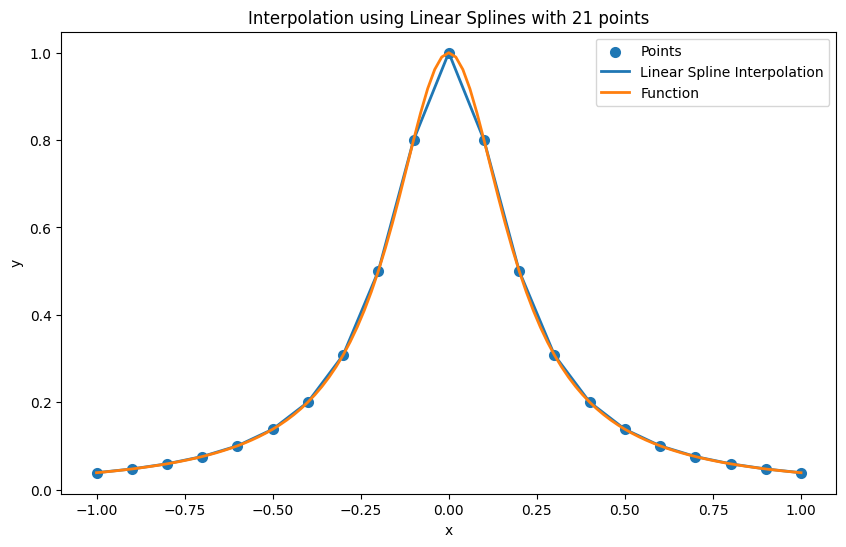

In [27]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Linear Splines with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,yss,label = 'Linear Spline Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()


### Cubica

In [28]:
spline = spi.interp1d(xi, yi, kind='cubic')
yss = spline(xs)
# calculate the mean squared error using the cubic splines
# this will be compared with earlier methods and linear splines
errors = yss - yf
squared_errors = np.square(errors)
mse_cubic = np.mean(squared_errors)


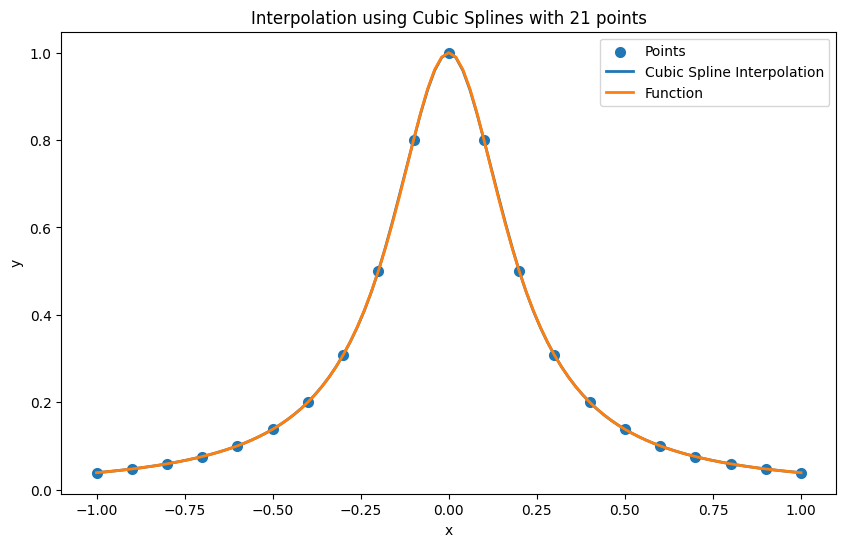

In [29]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Cubic Splines with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,yss,label = 'Cubic Spline Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

In [30]:
print(f'MSE for Lagrange using 21 points: {mse_21}')
print(f'MSE for linear splines using 21 points: {mse_linear}')
print(f'MSE for cubic splines using 21 points: {mse_cubic}')

MSE for Lagrange using 21 points: 137.81624664157084
MSE for linear splines using 21 points: 0.00010879299328245075
MSE for cubic splines using 21 points: 7.649788171824937e-07


#### Análise

Como podemos ver, ao utilizar interpolação por partes, o erro quadrático médio dos resultados diminuiu significantemente, mesmo mantendo o número de 21 pontos para interpolação.

Isto se deve ao fato mencionado anteriormente, de que este método calcula um polinômio para cada intervalo entre dois nós, e assim utiliza apenas a informação de de nós próximo, sem aumentar o grau do polinômio

Também é importante ressaltar que o erro utilizando splines cúbicas foi notavelmente menor do que utilizando splines lineares, o que é explicado pelo fato de que splines cúbicas também interpolam as derivadas de primeiro e segundo grau dos polinômios, assim gerando curvas fluidas e que aproximam melhor a função f.

## e)

Neste exercício iremos utilizar nós de Chebyshev para evitar o fenômeno de Runge.

Ao minimizar o erro da interpolação baseado na posição x dos nós, encontramos os nós de chebyshev, e assim podemos utilizar eles em interpolação com graus maiores.

In [31]:
# function to generate Chebyshev nodes based on [a,b] range
def gen_chebyshev_nodes(n, a, b):
    nodes = []
    for k in range(n):
        nodes.append(0.5 * (a + b) + 0.5 * (b - a) * np.cos((2*k + 1) * np.pi / (2*(n+1))))
    return nodes

### 11 points

In [32]:
n = 11

In [33]:
xi = np.array(gen_chebyshev_nodes(n, a, b))
yi = np.array([f(i) for i in xi])

#### Lagrange

In [34]:
ysl = np.array([lagrange_interpolation(xi, yi, x) for x in xs])

# we calculate the mean squared error using the 11 points for interpolation
# using Chebyshev nodes, this will be compared with the same method using equally spaced nodes
errors = ysl - yf
squared_errors = np.square(errors)
mse_11_chebyshev = np.mean(squared_errors)


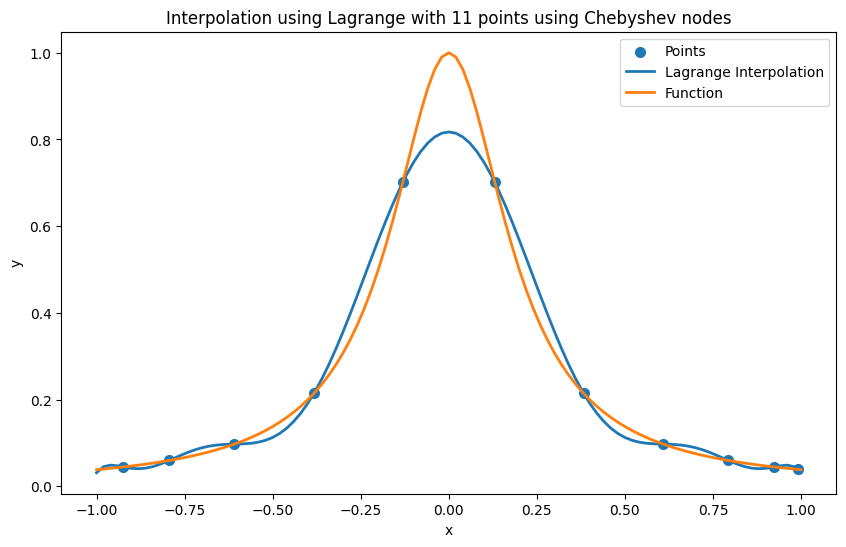

In [35]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Lagrange with {n} points using Chebyshev nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysl,label = 'Lagrange Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

#### Newton

In [36]:
ysn = newton_interpolation(xi, yi, xs)

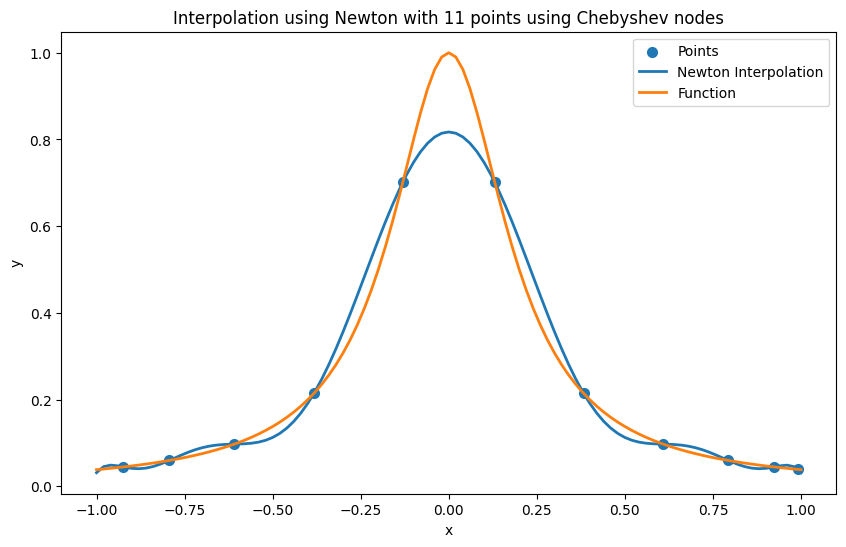

In [37]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Newton with {n} points using Chebyshev nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysn,label = 'Newton Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

### 21 points

In [38]:
n = 21

In [39]:
xi = np.array(gen_chebyshev_nodes(n, a, b))
yi = np.array([f(i) for i in xi])

#### Lagrange

In [40]:
ysl = np.array([lagrange_interpolation(xi, yi, x) for x in xs])

# we calculate the mean squared error using the 21 points for interpolation
# using Chebyshev nodes, this will be compared with the same method using equally spaced nodes
errors = ysl - yf
squared_errors = np.square(errors)
mse_21_chebyshev = np.mean(squared_errors)


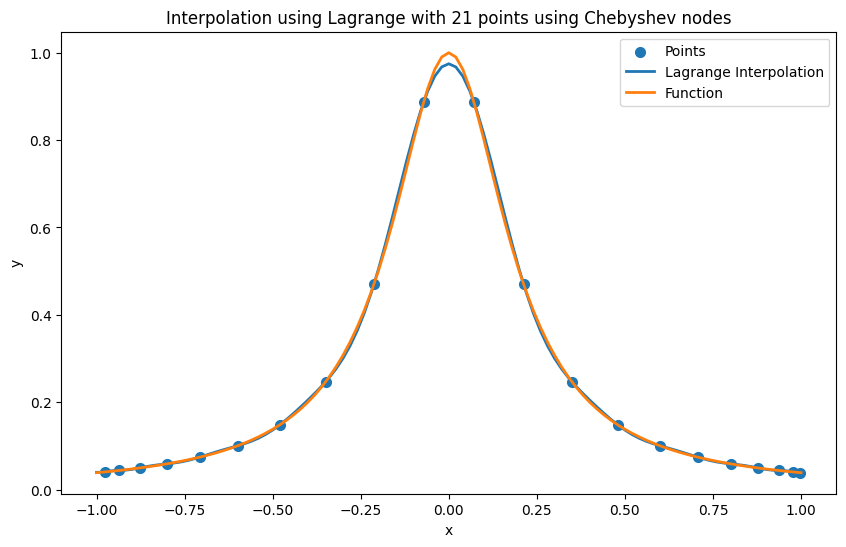

In [41]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Lagrange with {n} points using Chebyshev nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysl,label = 'Lagrange Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

#### Newton

In [42]:
ysn = newton_interpolation(xi, yi, xs)

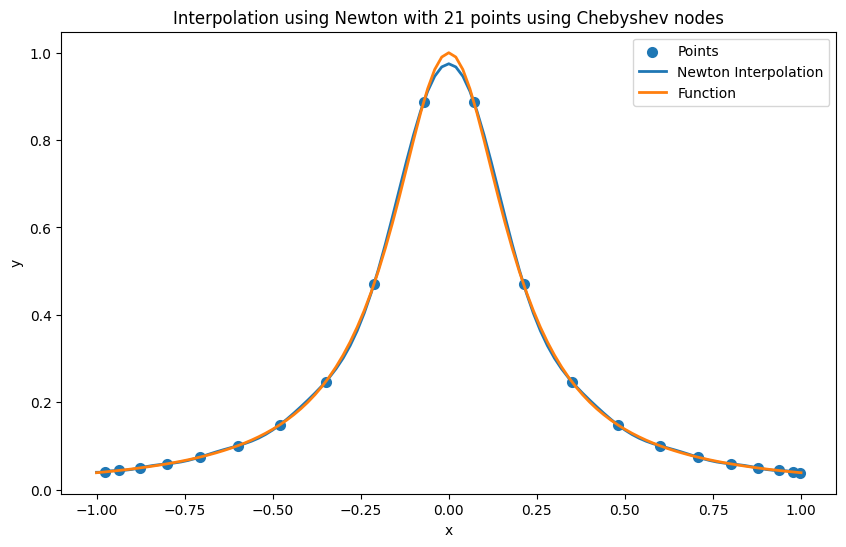

In [43]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Newton with {n} points using Chebyshev nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysn,label = 'Newton Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

In [44]:
print(f'MSE for Lagrange with 11 points: {mse_11}')
print(f'MSE for Lagrange with 21 points: {mse_21}')
print(f'MSE for Lagrange with 11 points using Chebyshev nodes: {mse_11_chebyshev}')
print(f'MSE for Lagrange with 21 points using Chebyshev nodes: {mse_21_chebyshev}')
print(f'Ratio of MSE for 11 points not using Chebyshev nodes and using Chebyshev nodes: {mse_11/mse_11_chebyshev}')
print(f'Ratio of MSE for 21 points not using Chebyshev nodes and using Chebyshev nodes: {mse_21/mse_21_chebyshev}')

MSE for Lagrange with 11 points: 0.33328575573986596
MSE for Lagrange with 21 points: 137.81624664157084
MSE for Lagrange with 11 points using Chebyshev nodes: 0.0027156208585490758
MSE for Lagrange with 21 points using Chebyshev nodes: 4.95775137229128e-05
Ratio of MSE for 11 points not using Chebyshev nodes and using Chebyshev nodes: 122.72911908547374
Ratio of MSE for 21 points not using Chebyshev nodes and using Chebyshev nodes: 2779813.594764385


#### Análise

Como podemos ver com os erros quadráticos médios expostos na célula anterior,
ao utilizar os nós de Chebyshev conseguimos reduzir significantemente o erro da aproximação.

Isto se deve ao que foi comentado anteriormente, de que os nós de chebyshev são calculados utilizando a seguinte expressão:

$$x_i = \frac{a+b}{2} + \frac{b-a}{2} \cos\left(\frac{(2i+1)\pi}{2(n+1)}\right)
\\
\forall i| 1 \leq i \leq n$$

A qual é alcançada ao minimizar o erro médio utilizando os valores x dos pontos usados para interpolação.

Assim, esta distribuição de pontos minimiza o Fenômeno de Runge.

# 5) Mínimos quadrados

## a)

Os códigos a seguir implementam a aproximação pelo método dos mínimos quadrados utilizando diferentes formas de calcular

O método MMQ, consiste em aproximar uma função $ f $ com um polinômio $ P $, ao minimizar o erro quadrático médio entre $ f $ e $P$

Para o caso discreto, em que não sabemos a função original e apenas temos um conjunto de dados, possuímos o seguinte conjunto de equações para aproximação por um polinômio P de grau m

$$
\begin{cases}
P_n(x_0) = \alpha_0 + \alpha_1 x_0 + \alpha_2 {x_0}^2 + ... + \alpha_m {x_0}^m
\\
...
\\
P_n(x_n) = \alpha_0 + \alpha_1 x_n + \alpha_2 {x_n}^2 + ... + \alpha_m {x_n}^m
\end{cases}
$$

Podemos reescrever em sua forma matricial:

$$
\begin{bmatrix}
1 && x_0 && {x_0}^2 && ... && {x_0}^m \\
\vdots && \vdots && \vdots && \ddots && \vdots \\
1 && x_n && {x_n}^2 && ... && {x_n}^m
\end{bmatrix}

\begin{bmatrix}
\alpha_0 \\
\vdots \\
\alpha_m
\end{bmatrix}

=

\begin{bmatrix}
y_0 \\
\vdots \\
y_n
\end{bmatrix}
$$

A partir disso, podemos extrair uma matriz de vandermond, considerando apenas as primeiras m linhas do sistema

$$
\begin{bmatrix}
1 && x_0 && {x_0}^2 && ... && {x_0}^m \\
\vdots && \vdots && \vdots && \ddots && \vdots \\
1 && x_m && {x_m}^2 && ... && {x_m}^m
\end{bmatrix}
$$

Como neste caso, temos a seguinte condição: $ x_i \neq x_j \forall i,j | i \neq j$, então o determinantes desta matriz é diferente de 0, e assim os vetores coluna da matriz são linearmente independentes, e formam uma base para o espaço polinomial de grau m.

Chamaremos o conjunto de vetores coluna de $U = \{u_1, u_2, ..., u_m\}$.

Para aproximar a função original, realizaremos a projeção ortogonal usando o produto interno usual, utilizando a base $U$.

$$
\begin{bmatrix}
\langle u_0, u_0 \rangle & \langle u_1, u_0 \rangle & \dots & \langle u_m, u_0 \rangle \\
\langle u_0, u_1 \rangle & \langle u_1, u_1 \rangle & \dots & \langle u_m, u_1 \rangle \\
\vdots & \vdots & \ddots & \vdots \\
\langle u_0, u_m \rangle & \langle u_1, u_m \rangle & \dots & \langle u_m, u_m \rangle
\end{bmatrix}
\begin{bmatrix}
\alpha_0 \\
\alpha_1 \\
\vdots \\
\alpha_m\end{bmatrix}
=\begin{bmatrix}
\langle y, u_0 \rangle \\
\langle y, u_1 \rangle \\
\vdots \\
\langle y, u_m \rangle
\end{bmatrix}
$$

### Implementação 1
Reescrevendo os produtos internos como produtos de matrizes, obtemos:

$$
\begin{equation}
X^T X\alpha = X^T y
\end{equation}
$$

Dessa forma, podemos encontrar os valores para o vetor de coeficientes $\alpha$, ao resolver o sistema $A\alpha = b$, com valores $A = X^T X$, $b=X^T y$.

Este método é o que é empregado na implementação 1 informada na questão, e também disponível na célula de código abaixo

### Implementação 2

A partir da Equação 1, podemos realizar a decomposição QR em todas as matrizes $X$, e com manipulação algébrica alcançamos a equação abaixo

$$
\begin{equation}
R\alpha = Q^T y
\end{equation}
$$

E assim, podemos calcular o vetor $\alpha$ ao resolver o sistema $A\alpha = b$, com valores $A = R$, $b = Q^T y$

Este método é o que é empregado na segunda implementação informada na questão, e também está disponível na célula de código abaixo

### Comparação

Os dois métodos possuem mesma complexidade, a qual é $O(mn^2)$ para m próximo de n, e sendo assim não possuem grande diferença em questão de número de operações.

Entretanto, o segundo método possui maior estabilidade numérica, uma vez que a multiplicação $X^TX$ é instável numericamente, e principalmente em matrizes com valores próximos de 0, pode gerar grande imprecisão numérica.

Portanto, para os fins desta questão, utilizaremos apenas a implementação 2, ou seja, a função com nome mmqQR.

In [45]:
# Implementation 1
def mmq(x, y, k) :
    X = np.vander(x, k)
    A = np.transpose(X).dot(X)
    b = np.transpose(X).dot(y)
    a = np.linalg.solve(A, b)
    return a

# Implementation 2
def mmqQR(x, y, k):
    X = np.vander(x, k)
    (Q,R) = np.linalg.qr(X)
    b = np.transpose(Q).dot(y)
    a = np.linalg.solve(R, b)
    return a

## b)
Nesta questão iremos aproximar os dados disponíveis sobre os número de casos acumulados de Covid19 durante a pandemia no brasil, utilizando uma função exponencial

In [46]:
xs = np.linspace(0, 118, num=201, endpoint=True)

In [47]:
yiorig = np.loadtxt('casosacumuladosbrasilatuaizado.txt')
xiorig = np.arange(len(yiorig))

In [48]:
def get_exponential(days=118):
    if days > 0:
        yi = np.loadtxt('casosacumuladosbrasilatuaizado.txt')[:days]
        xi = np.arange(days)
    else:
        yi = np.loadtxt('casosacumuladosbrasilatuaizado.txt')[days:]
        xi = np.arange(118 + days, 118)
    print(len(yi))
    print(len(xi))

    yiln = np.log(yi)

    alphas = mmqQR(xi, yiln, 2)

    a = np.exp(alphas[1])
    b = np.exp(alphas[0])
    print(a, b)

    f = lambda x: a * b**x
    ymmqexp = [f(x) for x in xs]

    yeorig = [f(x) for x in xiorig]
    errore = yeorig - yiorig
    squared_errors = np.square(errore)
    mseexp = np.mean(squared_errors)

    return ymmqexp, mseexp

In [49]:
ymmqexp, mseexp = get_exponential()

118
118
35.313041543172616 1.1113520177397236


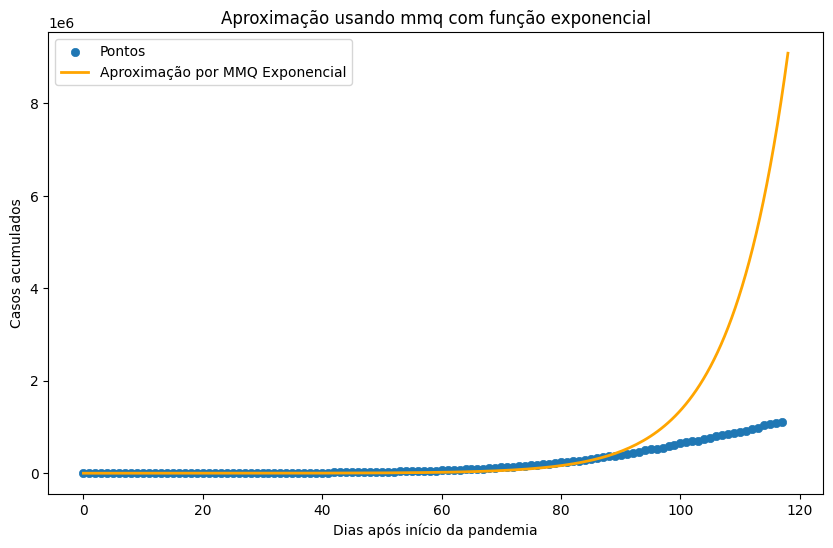

In [50]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq com função exponencial')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,ymmqexp,label = 'Aproximação por MMQ Exponencial',linewidth = 2, color='orange')
plt.legend()
plt.show()

### Análise

Como podemos ver, a função exponencial aproximou os dados, entretanto desviou nos últimos dias

## c)
Nesta questão iremos aproximar os dados disponíveis sobre os número de casos acumulados de Covid19 durante a pandemia no brasil, utilizando funções polinomiais de grau 4, 5 e 6

In [51]:
def get_polynomials(days=118):
    if days > 0:
        yi = np.loadtxt('casosacumuladosbrasilatuaizado.txt')[:days]
        xi = np.arange(days)
    else:
        yi = np.loadtxt('casosacumuladosbrasilatuaizado.txt')[days:]
        xi = np.arange(118 + days, 118)
    print(len(yi))
    print(len(xi))

    alphas4 = mmqQR(xi, yi, 5)
    alphas5 = mmqQR(xi, yi, 6)
    alphas6 = mmqQR(xi, yi, 7)

    f4 = lambda x: alphas4[-1] + alphas4[-2]*x + alphas4[-3]*x**2 + alphas4[-4]*x**3 + alphas4[-5]*x**4
    f5 = lambda x: alphas5[-1] + alphas5[-2]*x + alphas5[-3]*x**2 + alphas5[-4]*x**3 + alphas5[-5]*x**4 + alphas5[-6]*x**5
    f6 = lambda x: alphas6[-1] + alphas6[-2]*x + alphas6[-3]*x**2 + alphas6[-4]*x**3 + alphas6[-5]*x**4 + alphas6[-6]*x**5 + alphas6[-7]*x**6

    y4 = [f4(x) for x in xs]
    y5 = [f5(x) for x in xs]
    y6 = [f6(x) for x in xs]

    y4orig = [f4(x) for x in xiorig]
    y5orig = [f5(x) for x in xiorig]
    y6orig = [f6(x) for x in xiorig]

    error4 = y4orig - yiorig
    error5 = y5orig - yiorig
    error6 = y6orig - yiorig
    squared_error4 = np.square(error4)
    squared_error5 = np.square(error5)
    squared_error6 = np.square(error6)
    mse_4 = np.mean(squared_error4)
    mse_5 = np.mean(squared_error5)
    mse_6 = np.mean(squared_error6)

    return y4, y5, y6, mse_4, mse_5, mse_6



In [52]:
y4, y5, y6, mse_4, mse_5, mse_6 = get_polynomials()

118
118


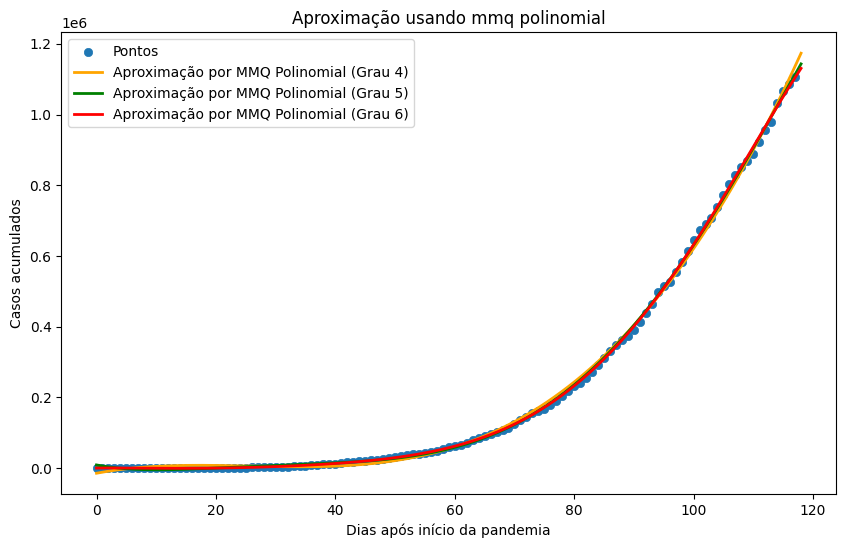

In [53]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq polinomial')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,y4,label = 'Aproximação por MMQ Polinomial (Grau 4)',linewidth = 2, color='orange')
plt.plot(xs,y5,label = 'Aproximação por MMQ Polinomial (Grau 5)',linewidth = 2, color='green')
plt.plot(xs,y6,label = 'Aproximação por MMQ Polinomial (Grau 6)',linewidth = 2, color='red')
plt.legend()
plt.show()

### Análise

Como podemos ver, as funções polinomiais conseguiram aproximar os dados muito bem, mesmo em relação aos dados dos últimos dias, sem grande diferença entre os diferentes graus

## d)
Neste item, iremos comparar os erros de truncamento entre os 4 métodos de aproximação utilizados, os erros já foram calculados anteriormente, uma vez que são o retorno das funções get_polynomials e get_exponential.

In [54]:
print(f'Truncate error for exponential: {mseexp}')
print(f'Truncate error for polynomial (degree 4): {mse_4}')
print(f'Truncate error for polynomial (degree 5): {mse_5}')
print(f'Truncate error for polynomial (degree 6): {mse_6}')
print(f'Ratio of MSE for polynomial degree 4 and exponential: {mse_4/mseexp}')
print(f'Ratio of MSE for polynomial degree 5 and exponential: {mse_5/mseexp}')
print(f'Ratio of MSE for polynomial degree 6 and exponential: {mse_6/mseexp}')

Truncate error for exponential: 1930127455431.5308
Truncate error for polynomial (degree 4): 99196816.73909728
Truncate error for polynomial (degree 5): 34851290.38071359
Truncate error for polynomial (degree 6): 26297491.827955347
Ratio of MSE for polynomial degree 4 and exponential: 5.139392036518087e-05
Ratio of MSE for polynomial degree 5 and exponential: 1.8056470976898087e-05
Ratio of MSE for polynomial degree 6 and exponential: 1.3624743668586307e-05


### Análise

A célula de código acima mostra os erros de cada método utilizado.

Podemos ver que os que utilizaram funções polinomiais para aproximar alcançaram valores mais próximos, sendo que seus erros de truncamento estão na ordem de ${10}^{-5}$ menores.

Isto pode ser explicado pelos métodos polinomiais utilizarem mais que o dobro de coeficientes que o método exponencial, assim possuindo um espaço de função com mais dimensões, por consequência possuindo mais informação, e podendo aproximar melhor a função original.

Comparando as funções polinomiais de diferentes graus, podemos observar que graus maiores possuíram menor erro, isto também pode ser explicado pelo fator mencionado no parágrafo acima, e por funções polinomiais de maior grau poderem variar derivadas de maiores graus, e assim obter comportamento mais complexo

## e)
Neste exercício, iremos realizar o mesmo experimento, mas utilizando apenas os primeiros 20 dias para treinamento

In [55]:
y4, y5, y6, mse_4, mse_5, mse_6 = get_polynomials(20)
ymmqexp, mseexp = get_exponential(20)

20
20
20
20
0.5965414187660085 1.3717182549417715


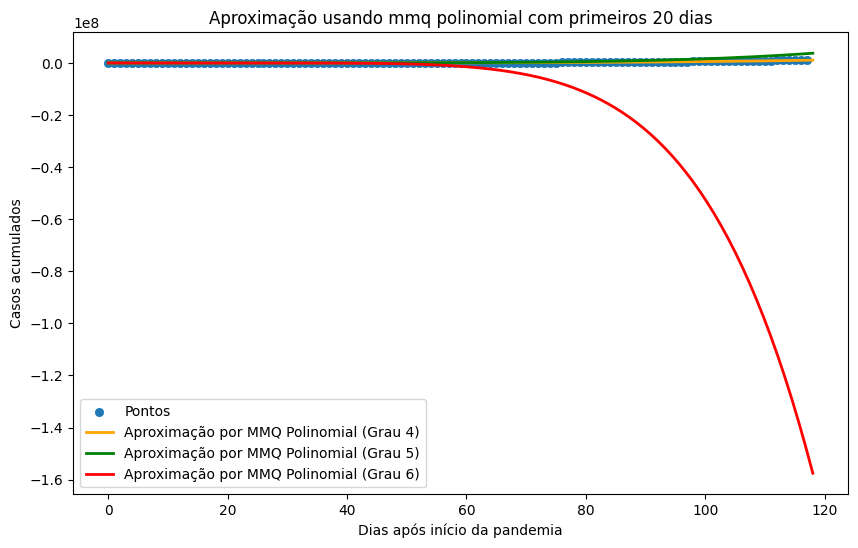

In [56]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq polinomial com primeiros 20 dias')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,y4,label = 'Aproximação por MMQ Polinomial (Grau 4)',linewidth = 2, color='orange')
plt.plot(xs,y5,label = 'Aproximação por MMQ Polinomial (Grau 5)',linewidth = 2, color='green')
plt.plot(xs,y6,label = 'Aproximação por MMQ Polinomial (Grau 6)',linewidth = 2, color='red')
plt.legend()
plt.show()

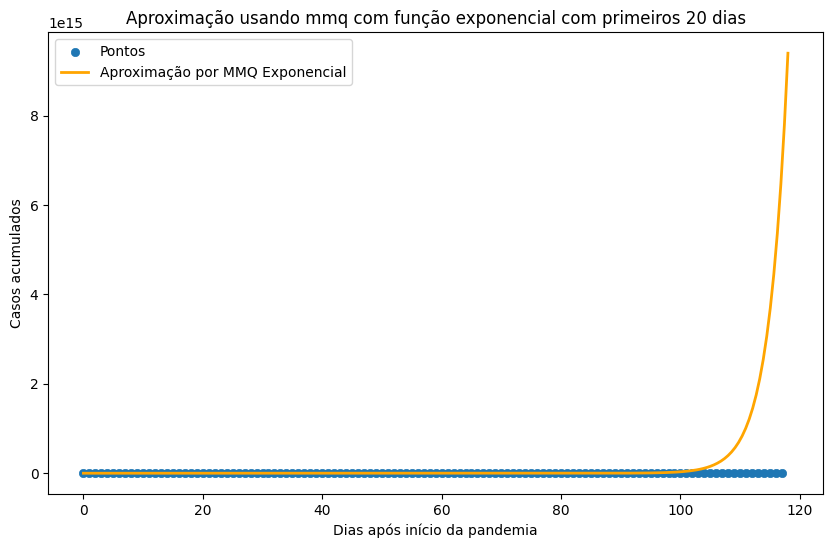

In [57]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq com função exponencial com primeiros 20 dias')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,ymmqexp,label = 'Aproximação por MMQ Exponencial',linewidth = 2, color='orange')
plt.legend()
plt.show()

In [58]:
print(f'Truncate error for exponential: {mseexp}')
print(f'Truncate error for polynomial (degree 4): {mse_4}')
print(f'Truncate error for polynomial (degree 5): {mse_5}')
print(f'Truncate error for polynomial (degree 6): {mse_6}')
print(f'Ratio of MSE for polynomial degree 4 and exponential: {mse_4/mseexp}')
print(f'Ratio of MSE for polynomial degree 5 and exponential: {mse_5/mseexp}')
print(f'Ratio of MSE for polynomial degree 6 and exponential: {mse_6/mseexp}')

Truncate error for exponential: 8.484825821641608e+29
Truncate error for polynomial (degree 4): 2234863743.824446
Truncate error for polynomial (degree 5): 497035189922.00183
Truncate error for polynomial (degree 6): 1666129023459768.8
Ratio of MSE for polynomial degree 4 and exponential: 2.633953590566523e-21
Ratio of MSE for polynomial degree 5 and exponential: 5.857930385020415e-19
Ratio of MSE for polynomial degree 6 and exponential: 1.963657308332834e-15


### Análise

Com os dados acima, podemos observar que a função exponencial desviou muito da função inicial, e isso se deve aos primeiros dias possuírem comportamento quase constante, e assim não ser possível analisar a variação que ocorre posteriormente

Além disso, percebemos que quanto maior o grau da função polinomial, maior ficou o erro neste caso, uma vez que com 20 dias não é possível analisar a variação das derivadas de grau maior, assim não sendo possível fitar os últimos coeficientes, os quais assumem valores que não representam a função a ser aproximada.

## f)
Neste exercício, realizaremos o mesmo experimento, mas utilizando apenas os últimos 50 dias para o treinamento

In [59]:
y4, y5, y6, mse_4, mse_5, mse_6 = get_polynomials(-50)
ymmqexp, mseexp = get_exponential(-50)


50
50
50
50
5027.402520445858 1.0487908743252636


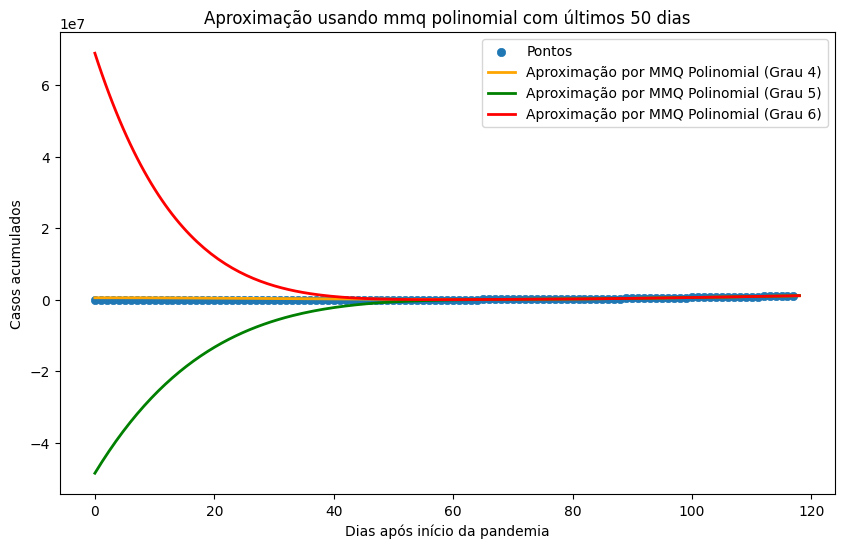

In [60]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq polinomial com últimos 50 dias')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,y4,label = 'Aproximação por MMQ Polinomial (Grau 4)',linewidth = 2, color='orange')
plt.plot(xs,y5,label = 'Aproximação por MMQ Polinomial (Grau 5)',linewidth = 2, color='green')
plt.plot(xs,y6,label = 'Aproximação por MMQ Polinomial (Grau 6)',linewidth = 2, color='red')
plt.legend()
plt.show()

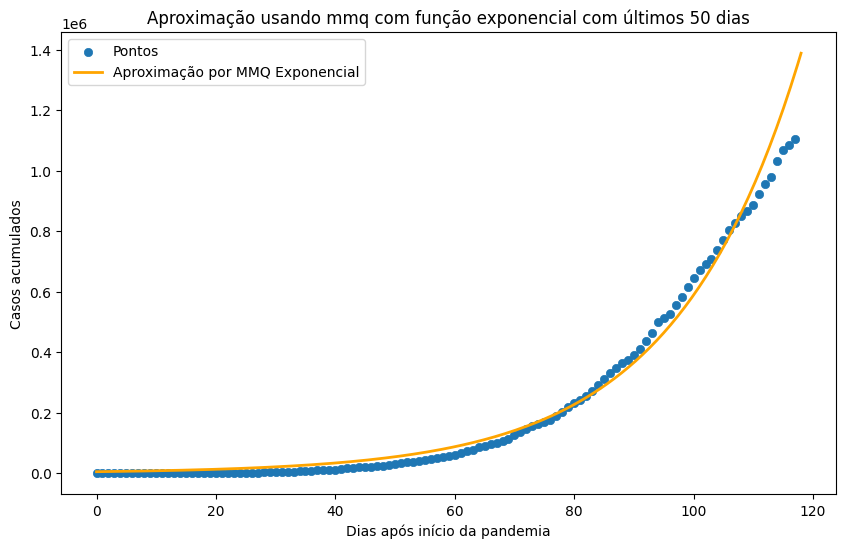

In [61]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq com função exponencial com últimos 50 dias')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,ymmqexp,label = 'Aproximação por MMQ Exponencial',linewidth = 2, color='orange')
plt.legend()
plt.show()

In [62]:
print(f'Truncate error for exponential: {mseexp}')
print(f'Truncate error for polynomial (degree 4): {mse_4}')
print(f'Truncate error for polynomial (degree 5): {mse_5}')
print(f'Truncate error for polynomial (degree 6): {mse_6}')
print(f'Ratio of MSE for polynomial degree 4 and exponential: {mse_4/mseexp}')
print(f'Ratio of MSE for polynomial degree 5 and exponential: {mse_5/mseexp}')
print(f'Ratio of MSE for polynomial degree 6 and exponential: {mse_6/mseexp}')

Truncate error for exponential: 1700936223.1217828
Truncate error for polynomial (degree 4): 71574673330.75302
Truncate error for polynomial (degree 5): 169080113302457.88
Truncate error for polynomial (degree 6): 268486475084956.7
Ratio of MSE for polynomial degree 4 and exponential: 42.07957497629731
Ratio of MSE for polynomial degree 5 and exponential: 99404.14637777525
Ratio of MSE for polynomial degree 6 and exponential: 157846.29161003747


### Análise

Neste caso, a função exponencial possuiu erro bem menor comparado em relação às alternativas polinomiais, assim podemos observar que utilizando os últimos dados, que possuem maior variação e comportamento exponencial, os coeficientes a e b aproximaram melhor a função real. Isso pode ser explicado pois no cálculo do erro quadrático médio, os valores iniciais que são constantes são muito numerosos, e assim pesam muito, dessa forma o cálculo dos coeficientes é melhor quando se analisa apenas a parte que há uma maior variação

Além disso é possível analisar que novamente quanto maior o grau da função polinomial, maior é o seu erro, e mais uma vez a explicação é que estas funções estão overfitando para os últimos 50 dias, e não possuem informação suficiente para representar toda a função original, e assim não é generalizável para os dados iniciais

## g)

### Todos
Analisando todos os resultados obtidos, podemos ver que analisando todos os dados, as funções polinomiais conseguem se ajustar bem e aproximar corretamente a função original, enquanto a função exponencial não aproxima direito por possuir muitos dados com pouca variação e que pesam muito no cálculo do erro quadrático médio.


### 20 primeiros
Utilizando os 20 primeiros dias, a função exponencial ainda piora, por só possuir dados quase constantes. Além disso, podemos observar que no caso das polinomiais, é melhor manter pouco grau, uma vez que quanto maior grau, a função não consegue ajustar os valores de coeficientes com grau maior, e passa a ser menos generalisável para o resto do conjunto de dados

### 50 últimos
Utilizando os últimos 50 dias, podemos observar comportamento semelhante nas funções polinomiais, as de grau maior estão overfitted para os últimos dias, e por consequência não são generálizaveis para o 20 primeiros. Entretanto podemos ver uma grande melhora no comporamento da função exponencial, e isso pode ser explicado pela maior variação entre estes dados, e assim os coeficientes da exponencial conseguem melhor representar sua variação, e ainda assim generalizar para os dados iniciais, que são quase constantes.